In [39]:
# Load the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

First Five Rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0

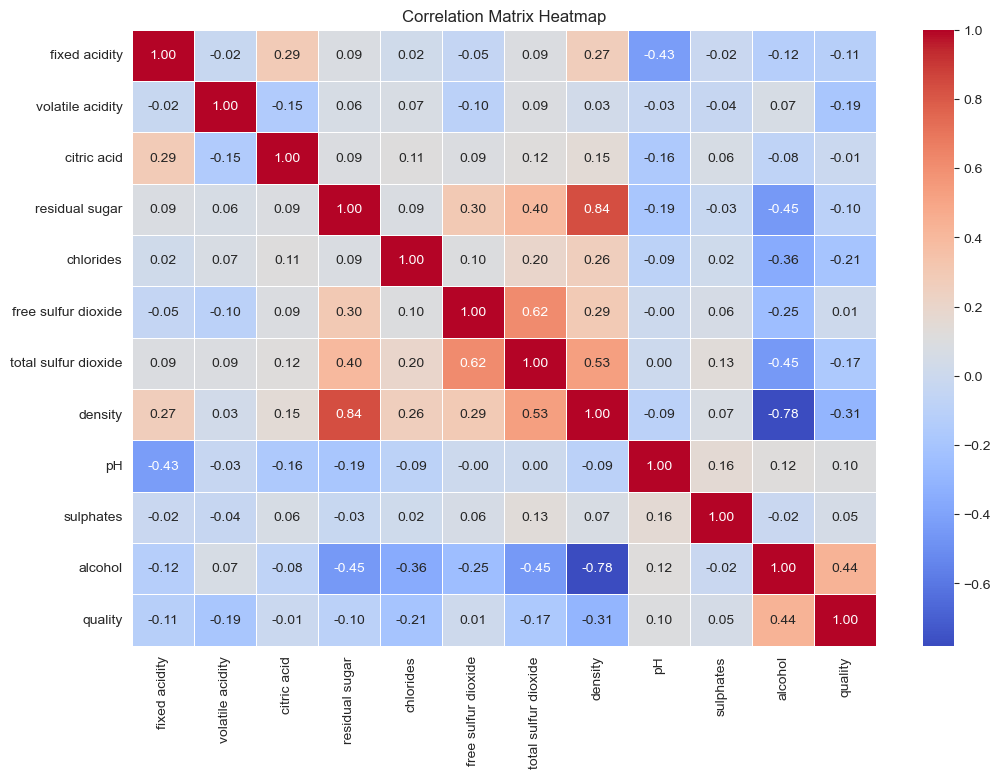


Preliminary discussion about key relationships in the data.
1. Alcohol vs. Quality: Strongest positive correlation (~0.44). Higher alcohol content is associated with better wine quality.
2. Density vs. Alcohol: Strong negative correlation (~-0.69). Denser wines tend to have lower alcohol content.
3. Total Sulfur Dioxide vs. Free Sulfur Dioxide: Highly correlated (~0.72). Total sulfur dioxide largely depends on free sulfur dioxide levels.
4. Residual Sugar vs. Density: Moderate positive correlation (~0.55). Sweeter wines tend to be denser.
5. Volatile Acidity vs. Quality: Noticeable negative correlation (~-0.26). Higher volatile acidity generally leads to lower wine quality.


In [36]:
# QUESTION 1: MULTIPLE LINEAR REGRESSION
## LOAD AND EXPLORE THE DATASET

### Load the datasets into a Pandas DataFrame.
winequality_data = pd.read_csv("winequality.csv", delimiter=";")

### Display the first five rows, column names, and data types.
print("Dataset Info:")
winequality_data.info()
print("\nFirst Five Rows:")
print(winequality_data.head())

### Print summary statistics
print("\nSummary Statistics:")
print(winequality_data.describe())

### Identify and handle missing values (if any).
print("\nMissing Values:")
print(winequality_data.isnull().sum())

### Compute the correlation matrix between variables.
corr_matrix = winequality_data.corr()

### Create a heatmap visualization using Seaborn.
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Provide a preliminary discussion about key relationships in the data (eg. which variables are highly correlated?)
print("\nPreliminary discussion about key relationships in the data.")
print("1. Alcohol vs. Quality: Strongest positive correlation (~0.44). Higher alcohol content is associated with better wine quality.")
print("2. Density vs. Alcohol: Strong negative correlation (~-0.69). Denser wines tend to have lower alcohol content.")
print("3. Total Sulfur Dioxide vs. Free Sulfur Dioxide: Highly correlated (~0.72). Total sulfur dioxide largely depends on free sulfur dioxide levels.")
print("4. Residual Sugar vs. Density: Moderate positive correlation (~0.55). Sweeter wines tend to be denser.")
print("5. Volatile Acidity vs. Quality: Noticeable negative correlation (~-0.26). Higher volatile acidity generally leads to lower wine quality.")


Model Summary Results:
Adjusted R^2 Score (Train): 0.2823
Adjusted R^2 Score (Test): 0.2569
Mean Squared Error (MSE): 0.5690
Root Mean Squared Error (RMSE): 0.7543
From the results, we can see the performance of the regression model and impact of key predictors. The Adjusted R^2 Score (Train) explains that 28.23% of the variance in the dependent variable is explained by the independent variables in the model; the value is relatively low. The Adjusted R^2 Score (Test) is 0.2569, suggesting that the model's performance on unseen data is consistent with its performance on training data as the test score is slightly lower than the training score.The Mean Squared Error(MSE) measures the average squared difference between predicted and actual values. The model is off by the value of 0.5690.The Root Mean Squared Error (RMSE) is the square root of the MSE. The value of 0.7543 suggests that the model's predictions on average will deviate from the actual values by around 0.7543 units.The impact

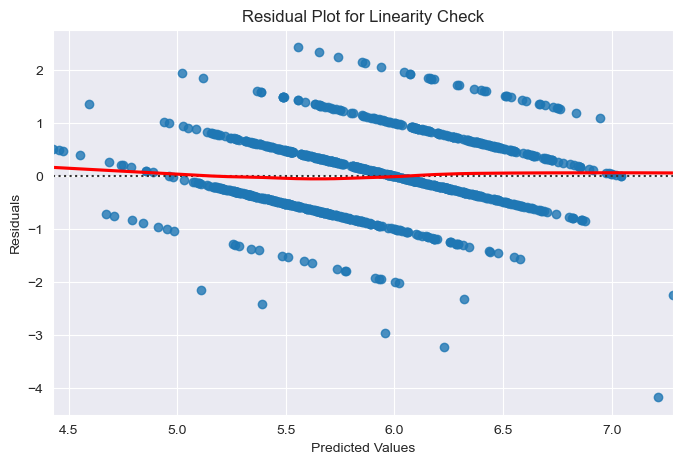


Variance Inflation Factor (VIF):
                 Feature          VIF
0          fixed acidity    92.861483
1       volatile acidity     9.730569
2            citric acid    10.007114
3         residual sugar     3.830272
4              chlorides     6.497448
5    free sulfur dioxide     9.261556
6   total sulfur dioxide    24.980802
7                density  1056.497431
8                     pH   609.861725
9              sulphates    20.527123
10               alcohol   118.707368


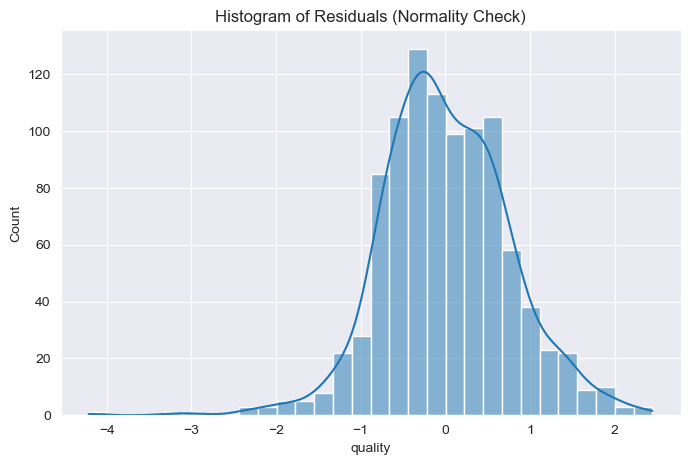

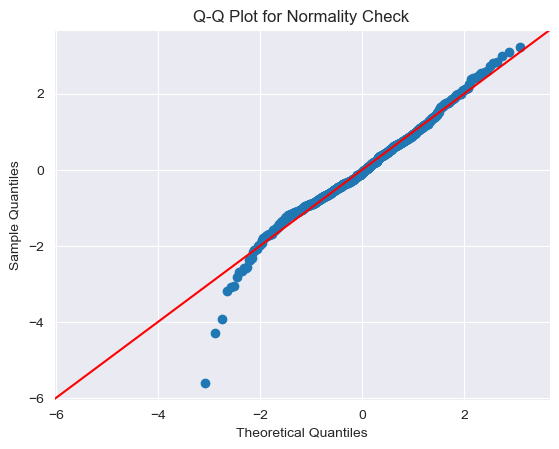

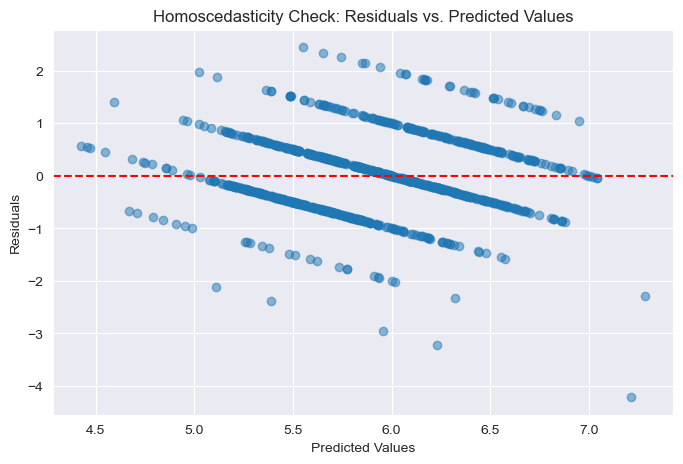

From the Homoscedasticity Check: Residuals vs. Predicted Values graph, we can conclude that the residuals do not have a constant variance. There seems to be a clear pattern of the residuals around zero across the predicted values, so it is more likely to have variability. 


In [37]:
# QUESTION 1: MULTIPLE LINEAR REGRESSION
## PERFORMING MULTIPLE LINEAR REGRESSION (MLR)
### Identify independent (X) and dependent (y) variables
X = winequality_data.drop(columns=['quality'])
y = winequality_data['quality']

### Split the dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Use scikit-learn’s LinearRegression to train the model.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Compute performance metrics
#### R^2 score on training data
r2_train = model.score(X_train, y_train)
#### R^2 score on test data
r2_test = model.score(X_test, y_test)
#### Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
#### Root Mean Squared Error
rmse = np.sqrt(mse)

### Adjusted R^2 Score
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

### Model Summary and Interpreted Results
print("\nModel Summary Results:")
print(f"Adjusted R^2 Score (Train): {adj_r2_train:.4f}")
print(f"Adjusted R^2 Score (Test): {adj_r2_test:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print("From the results, we can see the performance of the regression model and impact of key predictors. The Adjusted R^2 Score (Train) explains that 28.23% of the variance in the dependent variable is explained by the independent variables in the model; the value is relatively low. "
      "The Adjusted R^2 Score (Test) is 0.2569, suggesting that the model's performance on unseen data is consistent with its performance on training data as the test score is slightly lower than the training score."
      "The Mean Squared Error(MSE) measures the average squared difference between predicted and actual values. The model is off by the value of 0.5690."
      "The Root Mean Squared Error (RMSE) is the square root of the MSE. The value of 0.7543 suggests that the model's predictions on average will deviate from the actual values by around 0.7543 units."
      "The impact of key predictors can be analyzed by their coefficients. Significant predictors, such as ones with low p-values, can be especially important since they can provide meaning to the factors that impacting the model's predictions. ")

## ASSUMPTION CHECKS FOR MLR
### LINEARITY CHECK
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linearity Check")
plt.show()

### MULTICOLLINEARITY CHECK
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

### NORMALITY OF RESIDUALS
#### Histogram
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals (Normality Check)")
plt.show()

#### Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot for Normality Check")
plt.show()

### HOMOSCEDASTICITY CHECK
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs. Predicted Values")
plt.show()
print("From the Homoscedasticity Check: Residuals vs. Predicted Values graph, we can conclude that the residuals do not have a constant variance. There seems to be a clear pattern of the residuals around zero across the predicted values, so it is more likely to have variability. ")


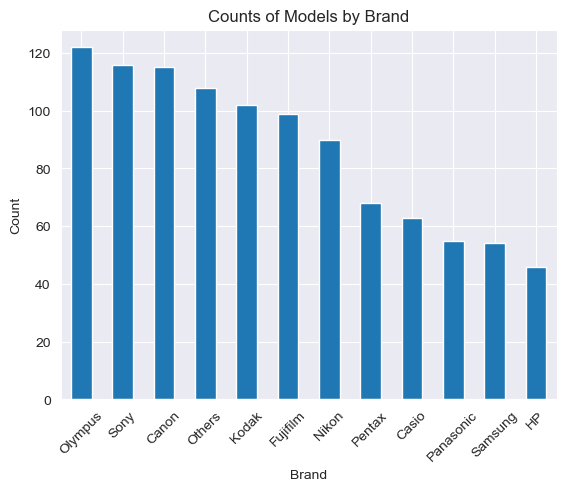

             Max resolution             Low resolution              \
                       mean         std           mean         std   
Release date                                                         
1994            1524.000000         NaN       0.000000         NaN   
1995            3060.000000         NaN       0.000000         NaN   
1996             784.000000  183.826005     448.000000  156.767344   
1997             849.454545  282.022823     378.181818  279.636127   
1998            1282.500000  387.470540     546.000000  222.288392   
1999            1470.339623  353.034698     716.075472  307.076027   
2000            1796.590164  428.047247    1049.901639  450.116196   
2001            1866.647059  469.173506    1116.611765  503.305836   
2002            2095.595506  591.016396    1390.764045  558.345079   
2003            2263.732673  447.534510    1484.653465  635.359370   
2004            2535.042553  601.480648    1836.510638  655.733544   
2005            2754

In [38]:
# QUESTION 2: DATA WRANGLING
## TASK 1
### Load the dataset and remove any leading spaces
camera_data = pd.read_csv("camera.csv", delimiter=",")
camera_data.columns = camera_data.columns.str.strip()

### Create a Brand column, extract brand names from the 'Model' column (assuming first word is the brand)
camera_data['Brand'] = camera_data['Model'].apply(lambda x: str(x).split()[0])

### Name all brands that are lower than 3% in number of models as one category “others”
brand_counts = camera_data['Brand'].value_counts()
threshold = 0.03 * len(camera_data)
camera_data['Brand'] = camera_data['Brand'].apply(lambda x: 'Others' if brand_counts[x] < threshold else x)

### Use this revised dataset to develop a bar chart to show the counts of models by brand.
camera_data['Brand'].value_counts().plot(kind='bar', title='Counts of Models by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Calculate and report the mean and standard deviation values for the ‘Max resolution’, ‘Low resolution’, ‘Zoom wide (W)’, and ‘Zoom Tele (T)’ columns within each year (‘Release date’)
mean_sd = camera_data.groupby('Release date').agg({'Max resolution': ['mean', 'std'],
                                                   'Low resolution': ['mean', 'std'],
                                                   'Zoom wide (W)': ['mean', 'std'],
                                                   'Zoom tele (T)': ['mean', 'std']})
print(mean_sd)

## TASK 2
### For every column that is numerical type, keep only the rows where the condition value >30 is satisfied.
numerical_cols = camera_data.select_dtypes(include=['number']).columns
camera_data = camera_data[(camera_data[numerical_cols] > 30).all(axis=1)]

### Filter rows from columns that start with letter ‘z’ or end with a letter ‘e’, where for all the selected columns, the values are strictly superior to 30.
selected_cols = [col for col in camera_data.columns if col.startswith('z') or col.endswith('e')]
if selected_cols:
    camera_data = camera_data[(camera_data[selected_cols] > 30).all(axis=1)]

### Keep only rows that price is bigger than 350 for selected Brands ‘Olympus’, ‘Sony’,‘Canon’, ‘Kodak’, and ‘Fujifilm.’
selected_brands = ['Olympus', 'Sony', 'Canon', 'Kodak', 'Fujifilm']
camera_data = camera_data[(camera_data['Brand'].isin(selected_brands)) & (camera_data['Price'] > 350)]

### Output this revised dataset into a csv file. Submit it together with your PDF file.
camera_data.to_csv('revised_camera_dataset.csv', index=False)
